# Experiment 1

In this experiment, we compare the performance of the following LDA and QDA classifiers within the myoelectric
interface setups from section 2.2 (in the publication):
1. A non-adaptive DA classifier trained over a small-labeled target training set Tˆ (individual classifier).
2. A non-adaptive DA classifier trained over a small-labeled target training set Tˆ and training sets from the source
users (multi-user classifier).
3. Our adaptive DA classifier from section 2.1 (In the publication).
4. [Liu’s adaptive DA classifier](https://ieeexplore.ieee.org/abstract/document/6985518/?casa_token=H9vZpl9IcF8AAAAA:Iom6Q55n9FSn-G9CqqS6bxQzzho7vvb0OtQPdgZMQBOuNo5HwCHZSh0wddgdSp6V3q_pFsSJ).
5. [Vidovic’s adaptive DA classifier](https://ieeexplore.ieee.org/abstract/document/7302056/?casa_token=3KVFZed5PzoAAAAA:rQJutibAYMQ_Za4ZSNEee6VIR59ZlWlt9o6_MKLFY2GKq2_zgYBkFPqs5UhrFCvMyP41SBbJ).

We use three databases are: [NinaPro5](http://ninaweb.hevs.ch/), [Côté-Allard](https://github.com/UlysseCoteAllard/MyoArmbandDataset), [EPN](https://ieeexplore.ieee.org/abstract/document/8903136/?casa_token=RYo5viuh6S8AAAAA:lizIpEqM4rK5eeo1Wxm-aPuDB20da2PngeRRnrC7agqSK1j26mqmtq5YJFLive7uW083m9tT). All of them contain EMG data of hand gestures acquired by a Myo armband. The three feature sets extracted from the databases are Hahne, Hudgins, and Phinyomark sets.

*Feature Set 1 (Hahne):*
1. Logarithm of the variance (logVAR)

*Feature Set 2 (Hudgins):*
1. Mean absolute value (MAV)
2. Waveform length (WL)
3. Zero Crossing (ZC)
4. Slope sign change (SSC)

*Feature Set 3 (Phinyomark):*
1. L-scale (LS)
2. Maximum fractal length (MFL)
3. Mean of the square root (MSR)
4. Willison amplitude (WAMP)



## Load Results

First: Import the library developed to visualize the results

In [1]:
import Experiments.Experiment1.VisualizationFunctions as VF1
import pandas as pd

Second: Load of the extraction times over the three databases

In [2]:
extractionTimeEPN=pd.read_csv('ExtractedData/ExtractedDataCollectedData/timesFeatures.csv',header=None)
extractionTimeCote=pd.read_csv('ExtractedData/ExtractedDataCoteAllard/timesFeatures.csv',header=None)
extractionTimeNinaPro5=pd.read_csv('ExtractedData/ExtractedDataNinaDB5/timesFeatures.csv',header=None)

Third: Load of the DA-based adaptation techniques' results over the three databases.

In [2]:
place='Experiments/Experiment1/ResultsExp1/'

# Nina Pro 5 database
database='NinaPro5'
resultsNinaPro5,timeNinaPro5=VF1.uploadResultsDatabase(place, database)

# Cote-Allard database
database='Cote'
resultsCote,timeCote=VF1.uploadResultsDatabase(place, database)

# EPN database
database='EPN'
resultsEPN,timeEPN=VF1.uploadResultsDatabase(place, database)

## Accuracy of the Five DA-based Classifiers vs the Number of Repetitions per Class in the Target Training Set $\hat{T}$

The following figure shows the comparison, over the three databases and the three feature sets, of the DA classifiers’ classification accuracy using the three adaption techniques and the two non-adaptive classifiers. For all classifiers, the accuracy increases as the number of repetitions in training set Tˆ increases as well. The accuracy of the individual classifier and the DA classifiers using the adaptation techniques are higher than the multi-user classifier’s accuracy. In NinaPro5 and
Côté-Allard, the classifiers’ best accuracy is obtained using the feature set 1 (Hahne set), while using the feature set 3
(Phinyomark set) in EPN. The accuracy of QDA classifiers is higher than of the LDA ones. In this figure, we can also
notice that most DA classifiers’ accuracy using our adaptation technique is higher than using the other approaches.
However, to determine if the differences between these accuracies are statistically significant, we use a one-tail Wilcoxon
signed-rank test. with a 95% of confidence ( pvalue less than 0.05)

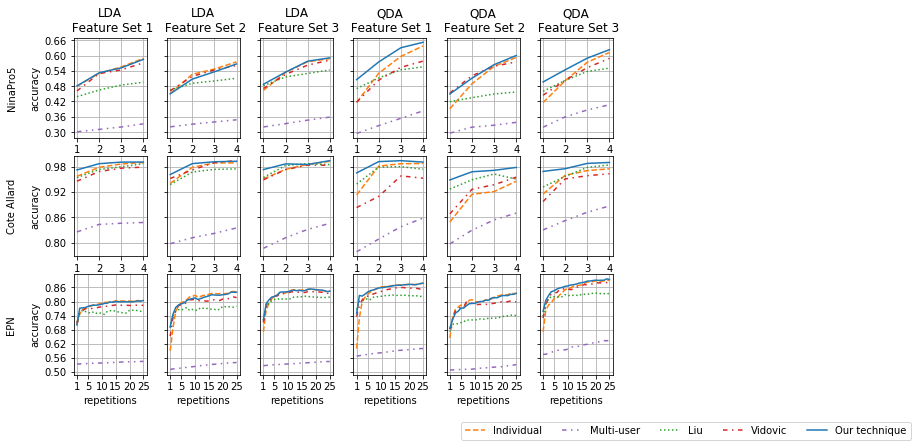

In [4]:
VF1.graphACC(resultsNinaPro5,resultsCote,resultsEPN)

## DA classifiers’ classification accuracy differences in percentage between our adaptive classifier and the DA-based approaches

The following table shows the DA classifiers’ classification accuracy differences between using our adaptation technique and using other approaches, such as the non-adaptive approach (individual classifier), and Liu and Vidovic adaptation techniques. In this table, a difference is positive when our technique’s accuracy is higher than the other approaches. We use an asterisk (\*) to denote that the difference is statistically significant. In this table, all statistically significant differences are positives, so that our adaptation technique’s accuracy is higher than or equal to using other approaches regardless of the DA classifier or the feature set. The differences are not positive and statistically significant when our adaptation technique does not find a DA classifier from the source classifiers to assist the training. For this reason, the accuracy using our technique tent to be equal to the individual classifier’s accuracy. 


Nina Pro 5

In [3]:
VF1.AnalysisWilcoxon("Experiments/Experiment1/ResultsExp1/",'NinaPro5' )


,FS:1 Shot:1,FS:1 Shot:2,FS:1 Shot:3,FS:1 Shot:4,FS:2 Shot:1,FS:2 Shot:2,FS:2 Shot:3,FS:2 Shot:4,FS:3 Shot:1,FS:3 Shot:2,FS:3 Shot:3,FS:3 Shot:4
Accuracy difference (Our and Individual classifiers) [%] LDA,0.140000,0.190000,-0.360000,-0.380000,-0.100000,-1.890000,-1.060000,-0.820000,2.390000,0.080000,0.220000,0.330000
p-value (Our and Individual classifiers) [%] LDA,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.046300,0.010912
Accuracy difference (Our and Liu classifiers) [%] LDA,4.220000,6.750000,6.740000,8.960000,-1.510000,1.650000,3.590000,5.600000,0.550000,1.880000,4.790000,4.760000
p-value (Our and Liu classifiers) [%] LDA,1.000000,0.006258,0.002531,0.002531,1.000000,0.002531,0.002531,0.002531,1.000000,0.003455,0.002531,0.002531
Accuracy difference (Our and Vidovic classifiers) [%] LDA,1.950000,0.310000,0.790000,1.380000,-1.220000,-1.080000,-0.740000,0.600000,1.650000,0.890000,1.530000,0.910000
p-value (Our and Vidovic classifiers) [%] LDA,1.000000,0.014208,0.010912,0.002531,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.014208,0.018329
Accuracy difference (Our and Individual classifiers) [%] QDA,8.900000,4.440000,3.390000,1.430000,5.800000,2.180000,0.660000,0.760000,8.080000,4.270000,1.620000,1.080000
p-value (Our and Individual classifiers) [%] QDA,0.002531,0.002531,0.003455,0.006258,0.003455,0.006258,1.000000,0.023427,0.002531,0.002531,0.023427,0.018329
Accuracy difference (Our and Liu classifiers) [%] QDA,3.500000,6.270000,8.680000,9.600000,2.990000,7.630000,11.490000,14.280000,3.650000,4.190000,5.210000,7.240000
p-value (Our and Liu classifiers) [%] QDA,0.008302,0.006258,0.003455,0.002531,0.002531,0.002531,0.002531,0.002531,1.000000,0.014208,0.003455,0.003455


Côté-Allard

In [4]:
VF1.AnalysisWilcoxon("Experiments/Experiment1/ResultsExp1/",'Cote' )


,FS:1 Shot:1,FS:1 Shot:2,FS:1 Shot:3,FS:1 Shot:4,FS:2 Shot:1,FS:2 Shot:2,FS:2 Shot:3,FS:2 Shot:4,FS:3 Shot:1,FS:3 Shot:2,FS:3 Shot:3,FS:3 Shot:4
Accuracy difference (Our and Individual classifiers) [%] LDA,1.510000,0.850000,0.450000,0.100000,2.090000,0.880000,0.280000,0.380000,2.220000,1.310000,-0.020000,0.170000
p-value (Our and Individual classifiers) [%] LDA,0.009559,0.003245,0.004304,0.001132,0.030752,1.000000,1.000000,1.000000,0.009559,0.002427,1.000000,0.021866
Accuracy difference (Our and Liu classifiers) [%] LDA,1.820000,1.370000,1.100000,0.410000,2.390000,2.000000,1.800000,1.800000,1.880000,0.390000,-0.170000,0.930000
p-value (Our and Liu classifiers) [%] LDA,0.027607,0.019737,0.003741,0.010841,0.042008,0.007543,0.003067,0.000468,1.000000,1.000000,1.000000,0.014937
Accuracy difference (Our and Vidovic classifiers) [%] LDA,2.670000,1.860000,1.430000,1.210000,0.930000,1.490000,0.190000,-0.160000,2.430000,1.360000,0.150000,1.090000
p-value (Our and Vidovic classifiers) [%] LDA,0.010841,0.007386,0.001800,0.006473,1.000000,1.000000,1.000000,1.000000,0.019737,0.013860,0.035163,1.000000
Accuracy difference (Our and Individual classifiers) [%] QDA,5.230000,1.070000,0.720000,0.330000,9.960000,5.340000,5.030000,3.280000,5.360000,1.560000,1.700000,1.500000
p-value (Our and Individual classifiers) [%] QDA,0.006473,0.003741,0.002617,0.001354,0.000147,0.000300,0.000698,0.000300,0.000501,0.004304,0.002427,0.002427
Accuracy difference (Our and Liu classifiers) [%] QDA,2.650000,1.300000,1.400000,1.710000,2.170000,1.900000,0.880000,2.760000,3.690000,1.810000,0.950000,0.570000
p-value (Our and Liu classifiers) [%] QDA,0.001545,0.002092,0.002228,0.014937,0.015625,0.002092,0.027607,0.006473,0.006473,0.024734,0.022117,0.042008


EPN

In [5]:
VF1.AnalysisWilcoxon("Experiments/Experiment1/ResultsExp1/",'EPN' )

,FS:1 Shot:1,FS:1 Shot:2,FS:1 Shot:3,FS:1 Shot:4,FS:2 Shot:1,FS:2 Shot:2,FS:2 Shot:3,FS:2 Shot:4,FS:3 Shot:1,FS:3 Shot:2,FS:3 Shot:3,FS:3 Shot:4
Accuracy difference (Our and Individual classifiers) [%] LDA,-0.120000,2.450000,0.650000,0.440000,10.060000,5.870000e+00,1.710000,0.280000,5.110000,2.580000,1.610000,7.000000e-01
p-value (Our and Individual classifiers) [%] LDA,1.000000,1.000000,1.000000,1.000000,0.000001,9.604606e-07,0.000012,0.002195,0.000002,0.000002,0.001805,1.500495e-02
Accuracy difference (Our and Liu classifiers) [%] LDA,-1.200000,2.110000,1.030000,1.650000,0.170000,5.800000e-01,1.760000,1.970000,-0.090000,1.410000,1.260000,1.560000e+00
p-value (Our and Liu classifiers) [%] LDA,1.000000,0.000003,0.000049,0.000004,1.000000,1.151907e-02,0.002660,0.000016,1.000000,0.000447,0.000481,4.233041e-06
Accuracy difference (Our and Vidovic classifiers) [%] LDA,-0.720000,1.520000,1.220000,0.440000,3.870000,1.410000e+00,1.330000,0.130000,1.080000,0.840000,0.270000,4.600000e-01
p-value (Our and Vidovic classifiers) [%] LDA,1.000000,1.000000,1.000000,0.015005,0.000002,1.081511e-05,0.000003,0.000057,0.000045,0.000194,0.025965,3.578517e-04
Accuracy difference (Our and Individual classifiers) [%] QDA,14.920000,9.510000,2.360000,1.400000,3.970000,-9.800000e-01,-1.500000,-1.750000,8.660000,4.150000,4.060000,4.760000e+00
p-value (Our and Individual classifiers) [%] QDA,0.000001,0.000002,0.000004,0.000012,0.000518,1.000000e+00,1.000000,1.000000,0.000002,0.000009,0.000005,1.301664e-06
Accuracy difference (Our and Liu classifiers) [%] QDA,-1.610000,2.440000,1.880000,2.430000,1.410000,2.060000e+00,4.580000,5.310000,2.000000,1.800000,1.380000,2.100000e+00
p-value (Our and Liu classifiers) [%] QDA,1.000000,0.000019,0.000010,0.000003,0.002660,1.301664e-06,0.000003,0.000002,1.000000,0.000068,0.000002,9.604606e-07


## Friedman Rank Test and Holm Post- Hoc of the DA-based Classifiers


In addition, we rank the adaptation approaches using the Friedman rank test and use the Holm post-hoc test to compare the best-ranked approach with the rest of them. The following results indicate the rank of the adaptation techniques, where our QDA classifier is the best approach, and this ranking is statistically significant with respect to the other seven classifiers.

In [6]:
VF1.AnalysisFriedman("Experiments/Experiment1/ResultsExp1/" )

Number of classifiers:  8 Number of evaluations (3(feature sets) x [10(people NinaPro5) x 4(shots) + 17(people Cote) x 4(shots) 30(people EPN) x 25(shots)]):  2574 

Should we reject H0 (i.e. is there a difference in the means) at the 95.0 % confidence level? True 

Our LDA classifier: 60.55
Individual LDA classifier: 63.36
Liu LDA classifier: 98.72
Vidovic LDA classifier: 79.27
Our QDA classifier: 36.30
Individual QDA classifier: 53.10
Liu QDA classifier: 80.22
Vidovic QDA classifier: 55.73

 The best classifier is:  Our QDA classifier
                                                   p   sig
Our QDA classifier vs Our LDA classifier         0.0  True
Our QDA classifier vs Individual LDA classifier  0.0  True
Our QDA classifier vs Liu LDA classifier         0.0  True
Our QDA classifier vs Vidovic LDA classifier     0.0  True
Our QDA classifier vs Individual QDA classifier  0.0  True
Our QDA classifier vs Liu QDA classifier         0.0  True
Our QDA classifier vs Vidovic QDA classifier

## Weight of the Parameters ($\hat{\omega_c}$ and $\hat{\lambda_c}$ ) in the training set $\hat{T}$

The following figure shows the average of the weights $\hat{\omega_c}$ and $\hat{\lambda_c}$, defined in section 2.1, vs. the number of repetitions per class in the training set $\hat{T}$. These two weights determine how much the parameters (the mean and the covariance) from the set $\hat{T}$ contribute to the training of a DA classifier. For the three databases, these two weights increase as the number of repetitions. Therefore, when the number of repetitions increase, the mean and the covariance of the DA classifier tend to be equal to the parameters from the training set $\hat{T}$. In table 2, most differences decrease as the number of repetitions increase because the weights $\hat{\omega_c}$ and $\hat{\lambda_c}$ tent to be equal to one.

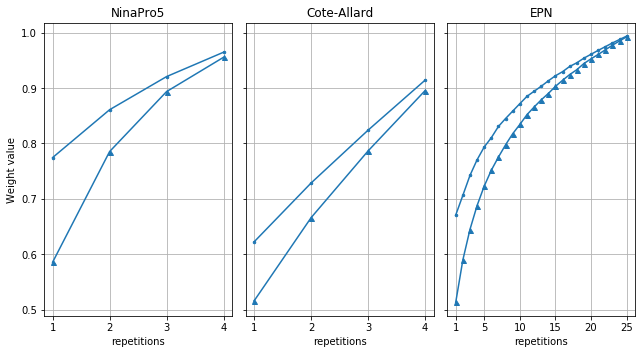

In [7]:
VF1.graphWeights(resultsNinaPro5,resultsCote,resultsEPN)

## Response Time and Training Time of Our Myoelectric Interface using Our Adaptation Technique

We calculate the response time of this interface, which is the sum of the time of data collection and the time of analysis of collected data. The time of data collection is 295ms, which is shown in section 2.2.1 (in the publication). For our adaptation technique, the following table shows the time of analysis of collected data, which is the sum of the extraction time and the classification time. In the table, all times of analysis are less than 5ms. Therefore, our adaptive interface works in real-time because the response time is less than 300 ms. In this table, the training time of our interface using our adaptation is 5 minutes approximately in the worst case (NinaPro5 and feature set 3). All calculated times were carried out on a desktop
computer with an Intel® Core™ i5-8250U processor and 8GB of RAM.

Nina Pro 5 database

In [8]:
VF1.analysisTime(extractionTimeNinaPro5, timeNinaPro5)


Feature set: 1
Training Time of Our Technique [s]:  199.08 +- 2.06
LDA
Extraction time [ms]:  0.75 0.36 Classification time [ms]:  1.08 0.02 Analysis time [ms]:  1.83 0.36
QDA
Extraction time [ms]:  0.75 0.36 Classification time [ms]:  1.69 0.05 Analysis time [ms]:  2.44 0.36

Feature set: 2
Training Time of Our Technique [s]:  267.07 +- 3.51
LDA
Extraction time [ms]:  1.0 0.47 Classification time [ms]:  1.6 0.02 Analysis time [ms]:  2.6 0.47
QDA
Extraction time [ms]:  1.0 0.47 Classification time [ms]:  2.28 0.03 Analysis time [ms]:  3.28 0.47

Feature set: 3
Training Time of Our Technique [s]:  266.55 +- 1.47
LDA
Extraction time [ms]:  2.38 0.86 Classification time [ms]:  1.58 0.02 Analysis time [ms]:  3.96 0.86
QDA
Extraction time [ms]:  2.38 0.86 Classification time [ms]:  2.27 0.03 Analysis time [ms]:  4.65 0.86


Cote-Allard database

In [9]:
VF1.analysisTime(extractionTimeCote, timeCote)


Feature set: 1
Training Time of Our Technique [s]:  50.56 +- 20.39
LDA
Extraction time [ms]:  0.39 0.32 Classification time [ms]:  0.82 0.45 Analysis time [ms]:  1.21 0.32
QDA
Extraction time [ms]:  0.39 0.32 Classification time [ms]:  1.33 0.71 Analysis time [ms]:  1.72 0.32

Feature set: 2
Training Time of Our Technique [s]:  43.94 +- 15.82
LDA
Extraction time [ms]:  0.6 0.41 Classification time [ms]:  0.96 0.43 Analysis time [ms]:  1.56 0.41
QDA
Extraction time [ms]:  0.6 0.41 Classification time [ms]:  1.32 0.62 Analysis time [ms]:  1.92 0.41

Feature set: 3
Training Time of Our Technique [s]:  37.54 +- 9.72
LDA
Extraction time [ms]:  1.28 0.6 Classification time [ms]:  0.99 0.65 Analysis time [ms]:  2.27 0.6
QDA
Extraction time [ms]:  1.28 0.6 Classification time [ms]:  1.24 0.58 Analysis time [ms]:  2.52 0.6


EPN database

In [10]:
VF1.analysisTime(extractionTimeEPN, timeEPN)


Feature set: 1
Training Time of Our Technique [s]:  26.59 +- 7.54
LDA
Extraction time [ms]:  0.24 0.31 Classification time [ms]:  0.62 0.13 Analysis time [ms]:  0.86 0.31
QDA
Extraction time [ms]:  0.24 0.31 Classification time [ms]:  0.9 0.23 Analysis time [ms]:  1.14 0.31

Feature set: 2
Training Time of Our Technique [s]:  26.52 +- 9.49
LDA
Extraction time [ms]:  0.44 0.52 Classification time [ms]:  0.83 0.23 Analysis time [ms]:  1.27 0.52
QDA
Extraction time [ms]:  0.44 0.52 Classification time [ms]:  1.08 0.35 Analysis time [ms]:  1.52 0.52

Feature set: 3
Training Time of Our Technique [s]:  26.24 +- 9.19
LDA
Extraction time [ms]:  0.89 0.57 Classification time [ms]:  0.81 0.23 Analysis time [ms]:  1.7 0.57
QDA
Extraction time [ms]:  0.89 0.57 Classification time [ms]:  1.08 0.35 Analysis time [ms]:  1.97 0.57
